# 1.0 Projeto Teste A/B - Eletronic House

## 1.1 Questão de Negócio

A Electronic House é uma loja online especializada em produtos de informática para residências e escritórios. No último ano, o faturamento total da empresa foi de 16 bilhões de reais. Os clientes podem adquirir no site diversos itens, como mouses, monitores, teclados, computadores, laptops, cabos HDMI, fones de ouvido, webcams, entre outros, e recebê-los no conforto de suas casas.

Após analisar as vendas do último ano, o time de Data Analytics constatou que o tecladoASUS ROG Strix Flare II8 foi responsável por 1% de todo o faturamento. Com base no histórico, verificou-se que esse produto além de apresentar uma boa taxa de conversão também possui uma margem de lucro satisfatória. A equipe de produtos da empresa decidiu criar uma estratégia para explorar o potencial de vendas doASUS ROG Strix Flare II8. Considerando essa oportunidade de negócio, o gerente de produto solicitou à equipe de designers de UX o desenvolvimento de uma nova página de vendas, com o objetivo de aumentar a taxa de conversão desse teclado no site.


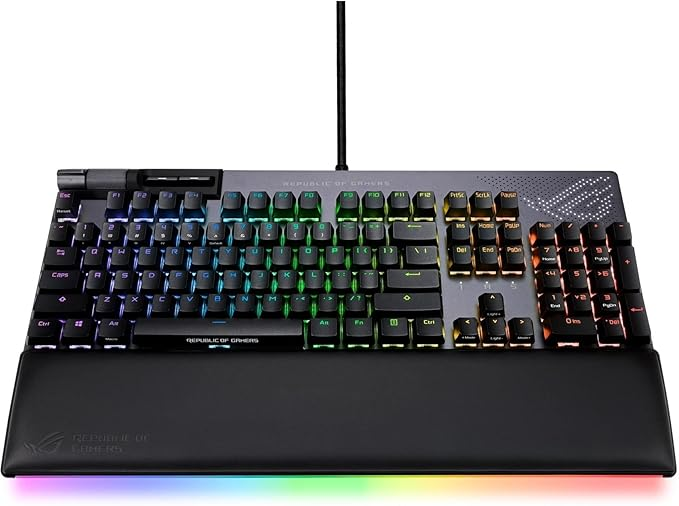

In [1]:
import math
from IPython.display import Image
Image('../imagens/asus_rog_strix_flare.JPG')

Página oficial do produto

https://rog.asus.com/keyboards/keyboards/pbt-keycaps/rog-strix-flare-ii-model/

## 1.2 Qual o problema de negócio?

### 1.2.1 Definição da taxa de conversão da nova página

Segundo o gerente de produto, a taxa de conversão da página atual do tecladoASUS ROG Strix Flare II8 tem sido, em média, 12% ao longo do último ano. O objetivo do product manager é aumentar a taxa de conversão em 2%, ou seja, a nova página de vendas, desenvolvida pelo time de UX, seria um sucesso se a sua taxa de conversão fosse de 14% .

### 1.2.2 O Problema - Minimizar os riscos da estratégia de alteração do layout

Antes de trocar a página de vendas antiga pela nova, o product manager gostaria de testar a efetividade da nova página em um grupo menor de clientes, a fim de correr menos riscos de queda da conversão, caso a página nova mostre uma conversão pior do que a página atual.

### 1.2.3 Expectativas de retorno financeiro caso a página nova converta 2% a mais que a página atual

In [2]:
# Acessos página atual do produto
acessos_clientes = 285000

# Conversão página atual 
pagina_atual = 0.12

# Expectativas do percentual de melhoria da nova página
pagina_nova  = 0.14

# preço do produto
preco_teclado = 4500

In [3]:
# Conversão de clientes da página atual
math.ceil(acessos_clientes*pagina_atual)

34200

In [4]:
# Faturamento página atual 
faturamento_atual = acessos_clientes * pagina_atual * preco_teclado
print('\nO faturamento da página atual corresponde a: R$ {:.2f} '.format(faturamento_atual))


O faturamento da página atual corresponde a: R$ 153900000.00 


In [5]:
# Conversão de clientes esperada da página nova 
math.ceil(acessos_clientes*pagina_nova)

39901

In [6]:
# Faturamento estimado página nova
faturamento_tratamento = acessos_clientes * pagina_nova * preco_teclado
print('\nO faturamento da página nova corresponde a: R$ {:.2f} '.format(faturamento_tratamento))


O faturamento da página nova corresponde a: R$ 179550000.00 


In [7]:
# diferença entre os faturamentos
diferenca = faturamento_tratamento-faturamento_atual
print('\nA diferença entre os faturamentos corresponde a: R$ {:.2f} '.format(diferenca))


A diferença entre os faturamentos corresponde a: R$ 25650000.00 


In [8]:
# calculo do lift da página nova em caso de sucesso
lift = faturamento_tratamento / faturamento_atual
print('\nO lift de ganho da página nova corresponde: {:.2f}% '.format((lift-1)*100))


O lift de ganho da página nova corresponde: 16.67% 


## 1.3 Proposta de solução do problema

Você foi contratado como consultor pela Electronic House para ajudar o time de Designers da nova página, a validar a sua efetividade de uma maneira mais segura, com mais confiança e rigidez na análise. A proposta é desenvolver um experimento de teste A/B entre a página atual e a nova desenvolvida pela equipe de UX.

Os entregáveis do seu trabalho são os seguintes:

1. A conversão da nova página é realmente melhor do a conversão da página atual?

2. Durante o teste qual foi o valor do faturamento total na venda do teclado bluetooth através da página antiga?

3. Durante o teste qual foi o valor do faturamento total na venda do teclado bluetooth através da nova página?

## 1.4 Os dados e as premissas do projeto

Este projeto de portfólio foi elaborado utilizando um dataset de teste A/B disponibilizado pela plataforma Kaggle Inc. O dataset contém aproximadamente 294.500 linhas e 5 features, com informações sobre o histórico de clientes que foram divididos em dois grupos e apresentados a diferentes páginas web. Além disso, há uma feature que indica se o cliente converteu ou não a compra.

O conjunto de dados está disponível na plataforma do Kaggle, através desse link:

https://www.kaggle.com/datasets/thetrueboolean/ab-data?resource=download

Cada linha do dataset possui as seguintes informações:

* “user_id”: Identificador do usuário

* “timestamp: Data e hora do acesso a página

* “Group”: Grupo que o usuário foi separado

* “landing_page”: Página web que foi mostrada ao usuário

* “converted”: Se o usuário converteu a compra após visualizar a página

Assumiremos no projeto que os dados do dataset correspondem a atual população. Dessa forma representaria os possíveis clientes interessados e que visitam o site no ano atual. Cabe destacar que este projeto de portfólio é uma criação hipotética, baseada na experiência do autor e nos dados coletados no Kaggle. Não é possível atestar a veracidade dos dados do dataset, nem confirmar se possuem conexão com o mercado real.


# 2.0 Imports 

In [9]:
import pandas as pd
import math
import numpy as np
import seaborn as sns

from statsmodels.stats import api as sms
from scipy import stats


from matplotlib      import pyplot as plt
from IPython.display import Image
from IPython.display import HTML


## 2.1 Helper functions

In [10]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

    #Retirar notação cientifica
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    pd.set_option('display.max_columns', None)


In [11]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 2.2 Loading Data

In [12]:
data = pd.read_csv('../data/ab_data.csv')

In [13]:
data.shape

(294478, 5)

In [14]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
# Salvando dataframe
df1 = data.copy()

# 3.0 Escolhendo o Método do Teste

O teste de hipóteses é uma ferramenta estatística que permite realizar inferências sobre dois ou mais grupos selecionados por meio de um processo de amostragem. O tipo de dados nas amostras e as comparações desejadas orientam para diferentes abordagens técnicas. As comparações entre os grupos podem ser feitas tanto para dados contínuos quanto para dados discretos/categóricos.

Para este projeto, o objetivo é determinar se a nova página consegue converter uma taxa maior de clientes em comparação à página antiga, a qual já se sabe que converte 12 de cada 100 clientes que a acessam. Para isso, foi escolhido um teste para dados discretos/categóricos, focando em verificar se o cliente efetuou a compra ou não após a alteração do layout. O teste Z para diferenças entre proporções de duas amostras unicaudal pode ser utilizado para realizar essa inferência estatística.

O teste utilizou duas amostras: a amostra do grupo de controle, composta por usuários que visualizaram apenas a página antiga, e outra amostra formada por clientes que visualizaram apenas a nova página. Para garantir a independência das amostras, foi crucial excluir usuários que acessaram ambas as páginas durante o teste.


# 4.0 Desing de Experimentos

## 4.1 Formulação das Hipóteses

<font color = 'red'>**Teste z para diferenças entre proporções de duas amostras unicaudal superior**</f>

**Grupos**

p1: proporção de conversão da página web de controle

p2: proporção de conversão da página web de tratamento

**Hipóteses**

**H0: $ p_{1} \ge p_{2}$** : A conversão da página de controle é maior ou igual a da página nova.

* Isso significa que a proporção de conversão no grupo de controle ( 𝑝1 - página antiga )  é maior ou igual à proporção de conversão no grupo de tratamento ( p2 - página nova ).

* Em outras palavras, a nova página web (grupo de tratamento) não tem uma taxa de conversão maior do que a página original (grupo de controle).

**H1: $ p_{1} < p_{2}$**   : A conversão da página de controle é menor a da página de tratamento.

* Isso significa que a proporção de conversão no grupo de controle ( 𝑝1 - página antiga ) é menor do que a proporção de conversão no grupo de tratamento ( 𝑝2 - página nova ).

* Em outras palavras, a nova página web (grupo de tratamento) tem uma taxa de conversão maior do que a página original (grupo de controle).


## 4.2 Parâmetros do Experimento - Teste Z de diferenças de proporções para duas amostras

### 4.2.1 Definição dos parâmetros do teste

In [16]:
# =============== O quanto de erro e aceito para o problema ===============
# nivel de confianca
confidence_level  = 0.95

# nivel de significancia
significance_level = 0.05

#potencia do teste estatistico
power = 0.80

# =============== O quanto eu espero que a nova página seja melhor ===============
# proporcoes da página --> conversões da página atual e da nova página
p1 = 0.12
p2 = 0.14

### 4.2.2 Calcular o tamanho do efeito

In [17]:
# =============== Teste de proporções cálculo do efeito ===============
# tamanho do efeito 
effect_size = sms.proportion_effectsize(p2,p1)
effect_size

0.05951079608252374

### 4.2.3 Calcular o tamanho mínimo das amostras

In [18]:
# =============== Qual o tamanho mínimo para a minha amostra para conseguir observar se tem ou não efeito ===============
# tamanho da amostra 
sample_n = sms.NormalIndPower().solve_power(
                                effect_size, 
                                power = power,
                                alpha = significance_level,
                                alternative = 'larger') 

# tamanho da amostra arredondado
sample_n = math.ceil(sample_n)

In [19]:
print('O tamanho total da amostra do teste é de : {}'.format(2*sample_n))
print('O tamanho da amostra do grupo controle é de : {}'.format(sample_n))
print('O tamanho da amostra do grupo de tratamento é de : {}'.format(sample_n))

O tamanho total da amostra do teste é de : 6984
O tamanho da amostra do grupo controle é de : 3492
O tamanho da amostra do grupo de tratamento é de : 3492


# 5.0 Preparação dos dados - População do projeto

Assumiremos no projeto que os dados do dataset correspondem a atual população. 

Dessa forma representaria os possíveis clientes interessados e que visitam o site no ano atual e que iriam ou comprar o produto.

Em um projeto real o experimento planejado coletaria amostras da população que acessa o site. 

## 5.1 Verificação da independência dos grupos

**Verificar se os clientes que estão em um grupo estão única e exclusivamente nesse grupo**

Precisa-se garantir o pressuposto de independência do teste

O Cliente amostrado não pode ter visto as duas páginas

In [20]:
# exemplo de usuário que viu as duas páginas
df1.loc[df1['user_id']==630052]

,user_id,timestamp,group,landing_page,converted
213114,630052,2017-01-07 12:25:54.089486,treatment,old_page,1
230259,630052,2017-01-17 01:16:05.208766,treatment,new_page,0


In [21]:
# lista dos clientes que viram as duas paginas
aux1 = df1[['user_id', 'group']].groupby( 'user_id').count().reset_index().query('group > 1')

In [22]:
# quantidade de clientes que observaram as duas páginas
aux1.shape[0]

3894

In [23]:
# Todos esses clientes são unicos
aux1['user_id'].unique().shape[0]

3894

In [24]:
# Remoção dos clientes que visualizaram as duas páginas
df3 = df1[~df1['user_id'].isin( aux1['user_id'])]

In [25]:
# quantidade de clientes unicos disponíveis na base
df3['user_id'].shape[0]

286690

In [26]:
df3.shape

(286690, 5)

In [27]:
# se não retornou linhas a remoção está ok.
df3[['user_id', 'group']].groupby( 'user_id').count().reset_index().query('group > 1')

,user_id,group


OBS.: Assumiremos no projeto que os dados do dataset correspondem a atual população. 

Dessa forma representaria os possíveis clientes interessados e que visitam o site no ano atual.

## 5.2 Análise Univariada das Variáveis

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


### 5.2.1 Identificador do usuário

In [29]:
# quantidade de clientes unicos da base
df3['user_id'].unique().shape[0]

286690

In [30]:
# quantidade de clientes da base
df3['user_id'].shape[0]

286690

### 5.2.2 Grupos

In [31]:
# quantidade de grupos na base
# --> Grupo Controle = control
# --> Grupo de Tratamento = treatment
df3['group'].unique()

array(['control', 'treatment'], dtype=object)

In [32]:
# quantidade de clientes em cada grupo
df3['group'].value_counts()

group
treatment    143397
control      143293
Name: count, dtype: int64

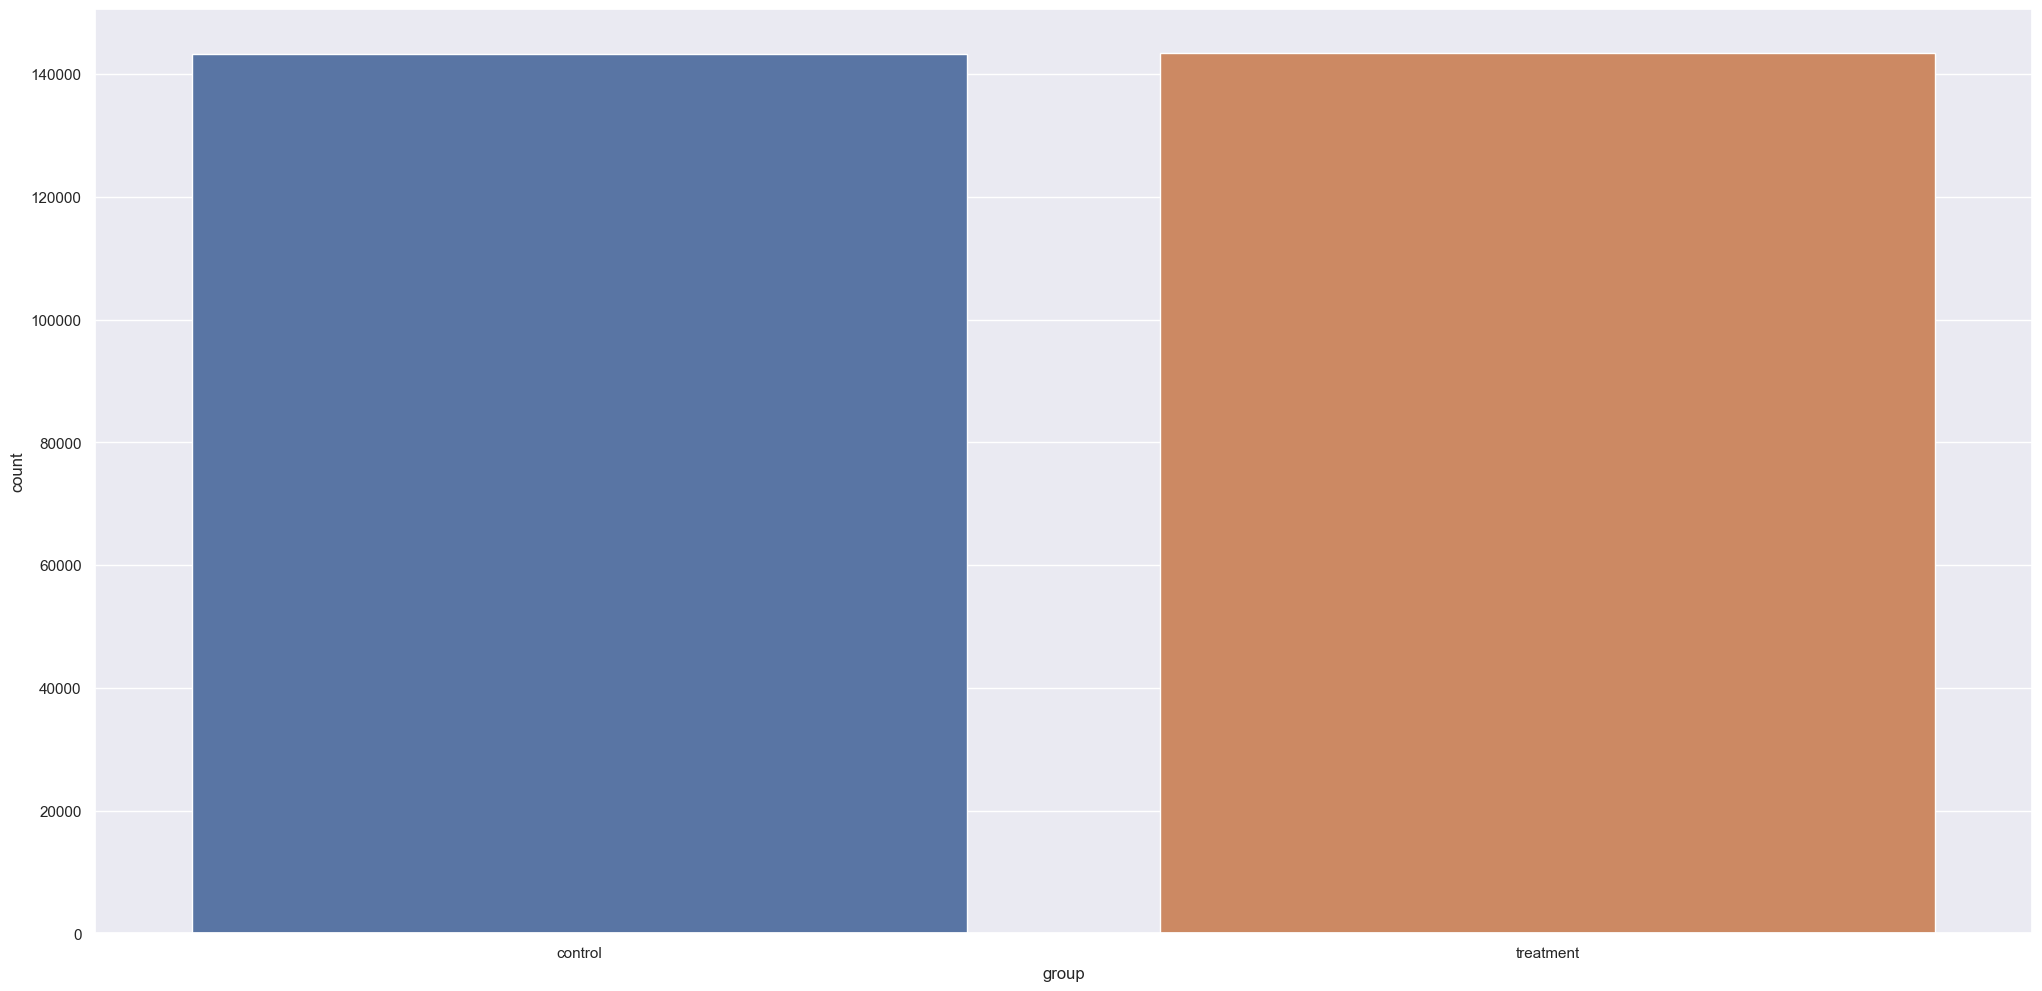

In [33]:
# Gráfico de barras das grupos
sns.countplot(data=df3, x= df3['group'],hue = df3['group']);

### 5.2.3 Página Web

In [34]:
# quantidade de páginas web 
# --> Página controle = old_page
# --> Página de tratamento = new_page
df3['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [35]:
df3['landing_page'].value_counts()

landing_page
new_page    143397
old_page    143293
Name: count, dtype: int64

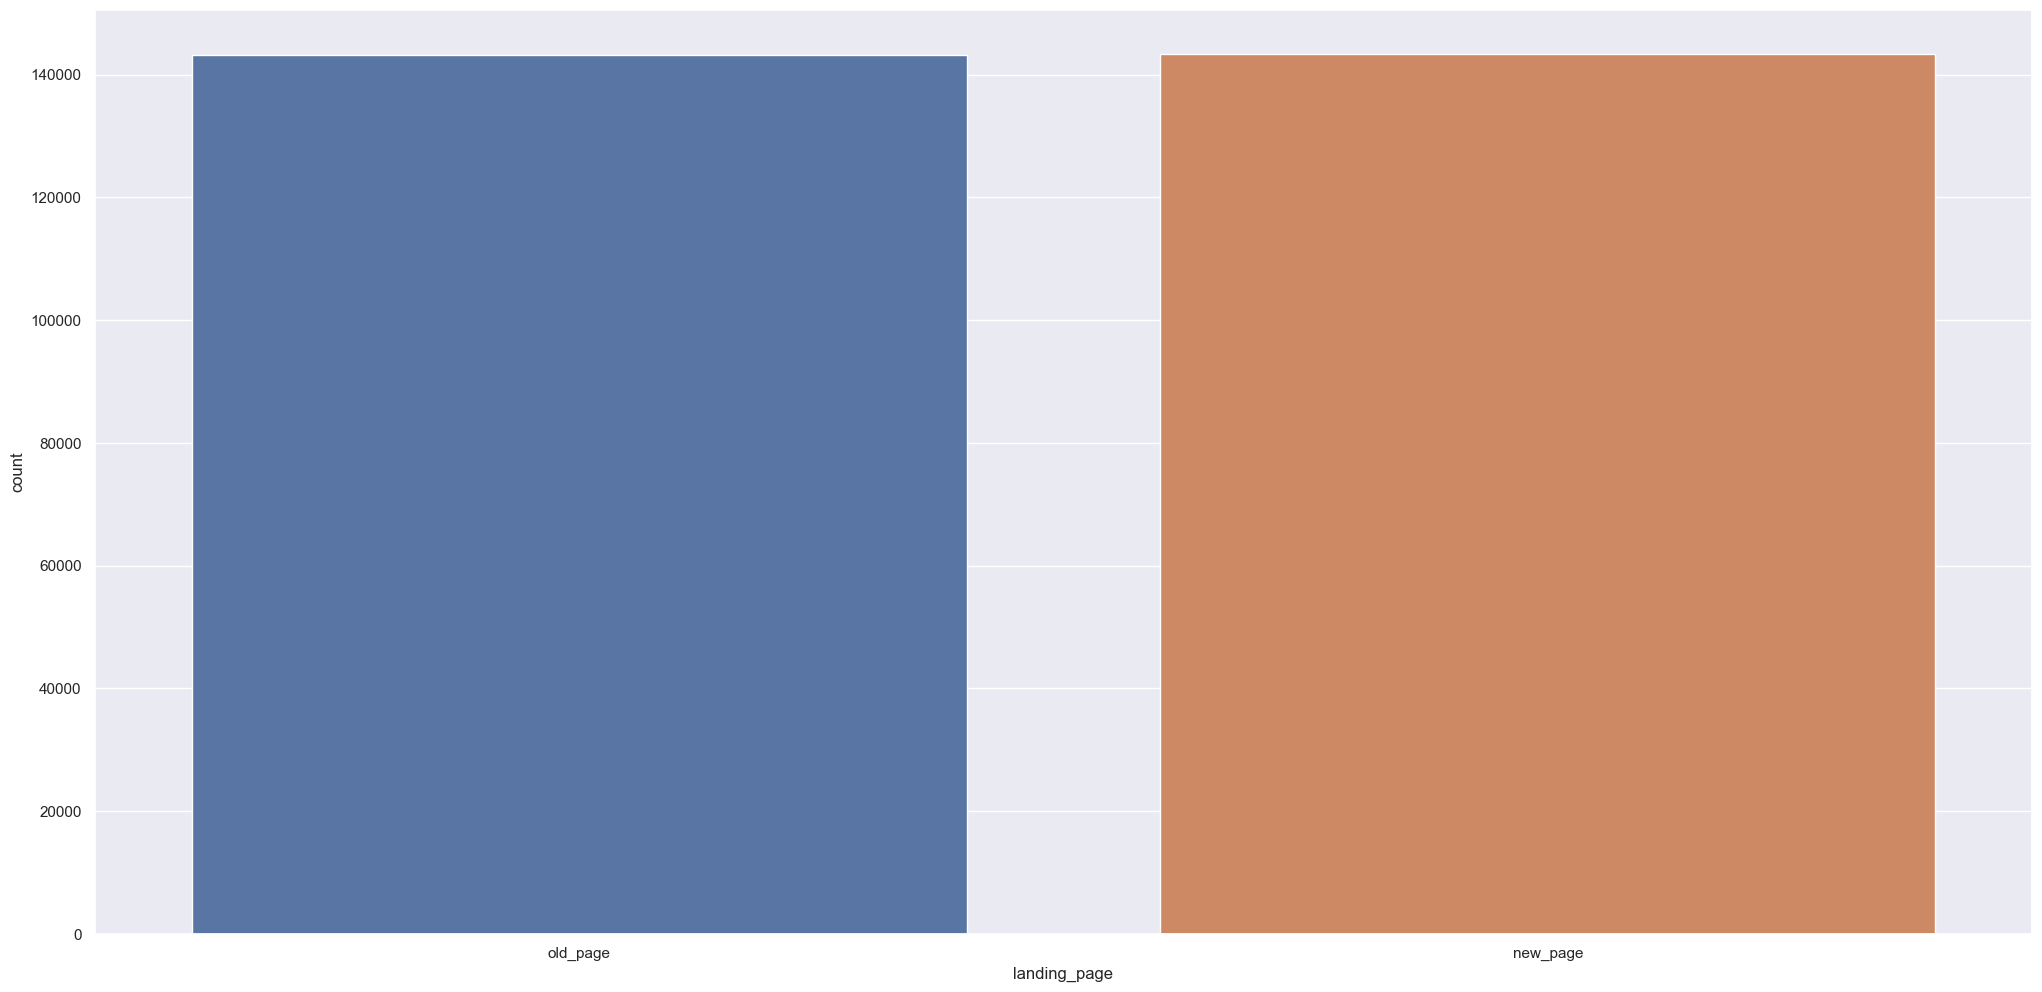

In [36]:
# Gráfico de barras das páginas web
sns.countplot(data=df3, x= df3['landing_page'], hue = df3['landing_page'] );

### 5.2.4 Conversão da Página Web

In [37]:
# quantidade de opções 
# --> Conversão em compra = 1 
# --> Não conversão em compra = 0
df3['converted'].unique()

array([0, 1], dtype=int64)

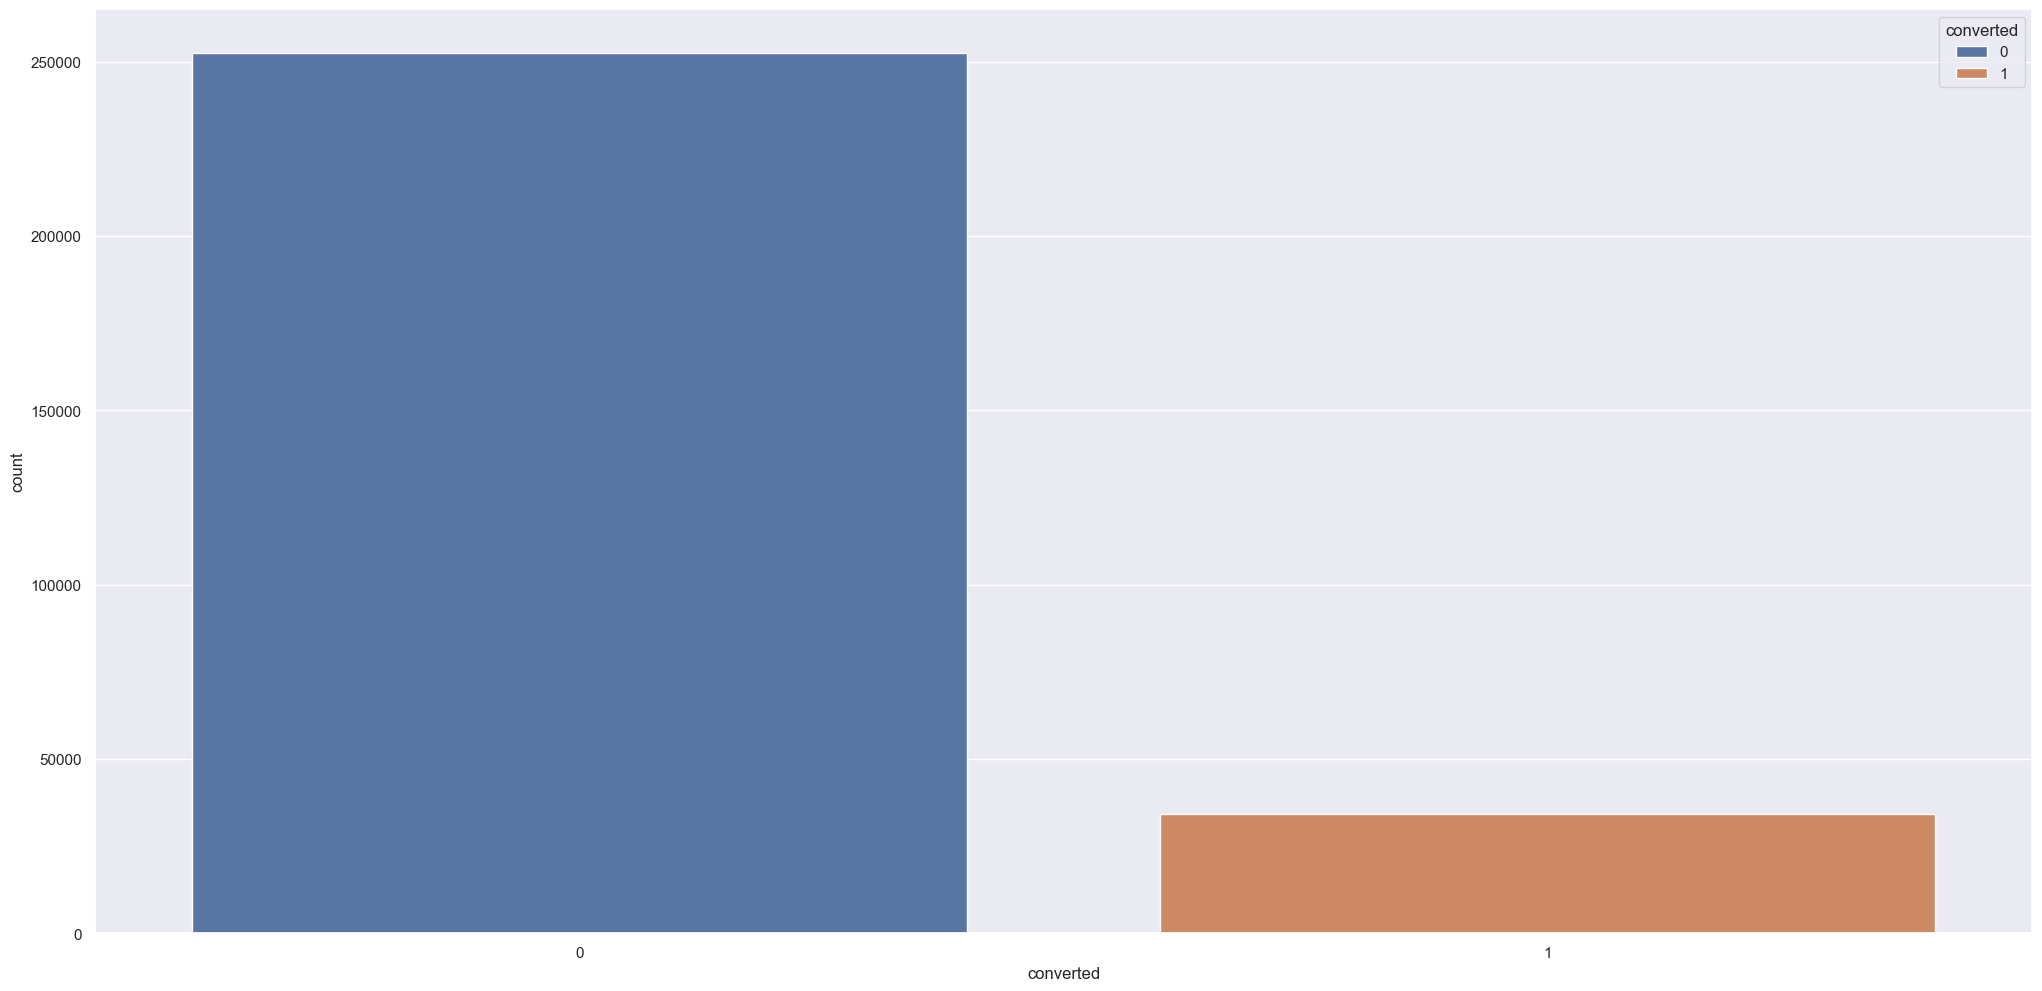

In [38]:
sns.countplot(data=df3, x= df3['converted'],hue=df3['converted']);

### 5.2.5 Data e hora do acesso a página

In [39]:
# Quantidade de datas distintas
df3['timestamp'].unique().shape[0]

286690

## 5.3 Análise Bivariada das Variáveis

**Existem usuários no grupo controle que visualizaram a página nova?**

In [40]:
# Total de usuários no grupo controle
df3.loc[(df3['group']=='control')].shape[0]

143293

In [41]:
# Usuários do grupo controle que visualizaram a página atual
df3.loc[(df3['group']=='control')&(df3['landing_page']=='old_page')].shape[0]

143293

In [42]:
# Não há usuários no grupo controle que visualizaram a página nova
df3.loc[(df3['group']=='control')&(df3['landing_page']=='new_page')]

,user_id,timestamp,group,landing_page,converted


**Existem usuários no grupo de tratamento que visualizaram a página antiga?**

In [43]:
# Total de usuários no grupo controle
df3.loc[(df3['group']=='treatment')].shape[0]

143397

In [44]:
# Usuários do grupo de tratamento que visualizaram a página nova
df3.loc[(df3['group']=='treatment')&(df3['landing_page']=='new_page')].shape[0]

143397

In [45]:
# Não há usuários no grupo de tratamento que visualizaram a página atual
df3.loc[(df3['group']=='treatment')&(df3['landing_page']=='old_page')]

,user_id,timestamp,group,landing_page,converted


## 5.4 Amostragem dos Grupos

In [46]:
df_amostra_tratamento = df3.loc[df3['group'] == 'treatment'].sample(n=sample_n, random_state=32)
df_amostra_controle   = df3.loc[df3['group'] == 'control'].sample(n=sample_n, random_state=32)

In [47]:
# tamanho da mostra de tratamento
df_amostra_tratamento.shape

(3492, 5)

In [48]:
# tamanho da mostra de controle
df_amostra_controle.shape

(3492, 5)

## 5.5 Taxa de conversão observadas nas amostras dos grupos

### 5.5.1 Taxa de conversão Grupo de Controle

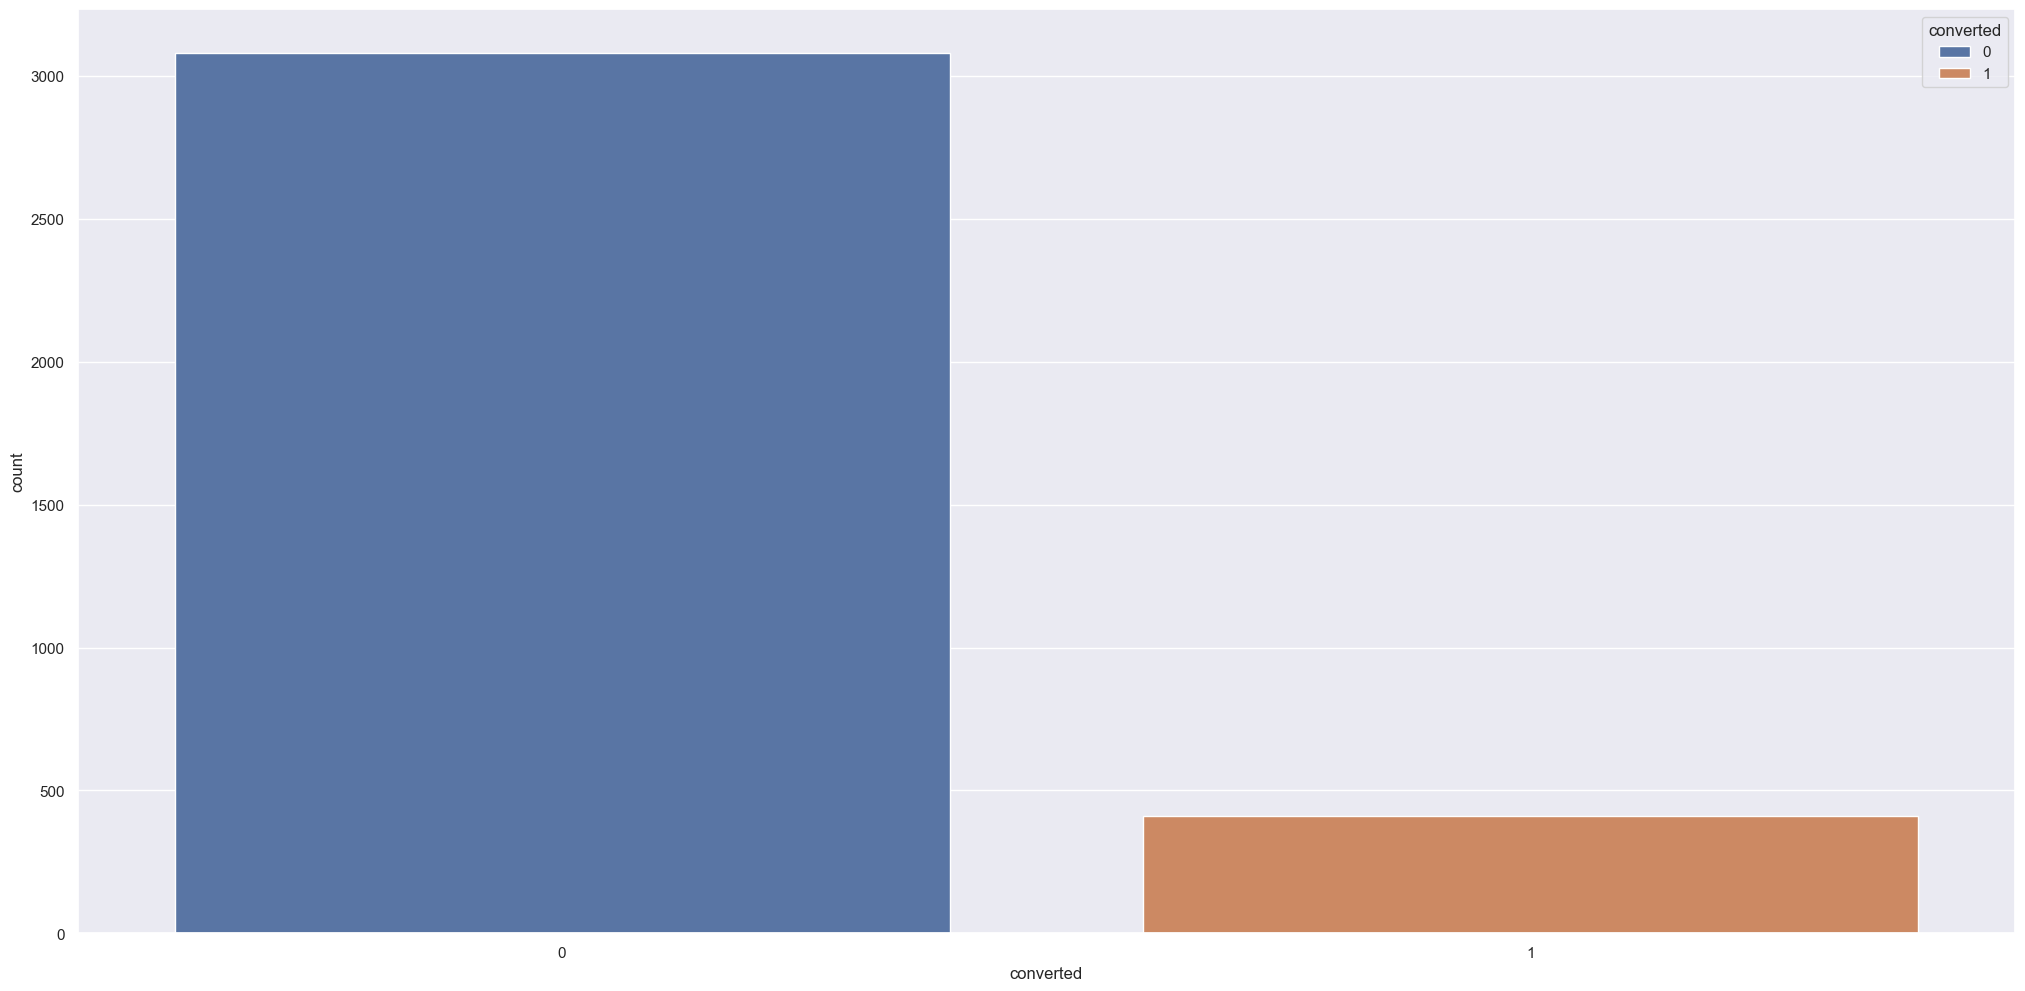

In [49]:
# Gráfico de barras das conversões da amostra do grupo controle

sns.countplot(data=df_amostra_controle, x= df_amostra_controle['converted'], hue = df_amostra_controle['converted']  );

In [50]:
# Quantidade de clientes que que converteram e compraram no grupo controle
compradores_conveted = df_amostra_controle.loc[df_amostra_controle['converted']==1, 'converted'].sum()
compradores_conveted

412

In [51]:
# Total de clientes da amostra de controle
total_clientes = df_amostra_controle.shape[0]
total_clientes

3492

In [52]:
# Cálculo da taxa de conversão do grupo controle
taxa_controle = compradores_conveted / total_clientes
print('A taxa de conversão do grupo controle: {:.2f} %'.format(taxa_controle * 100) )

A taxa de conversão do grupo controle: 11.80 %


### 5.5.2 Taxa de conversão Grupo de Tratamento

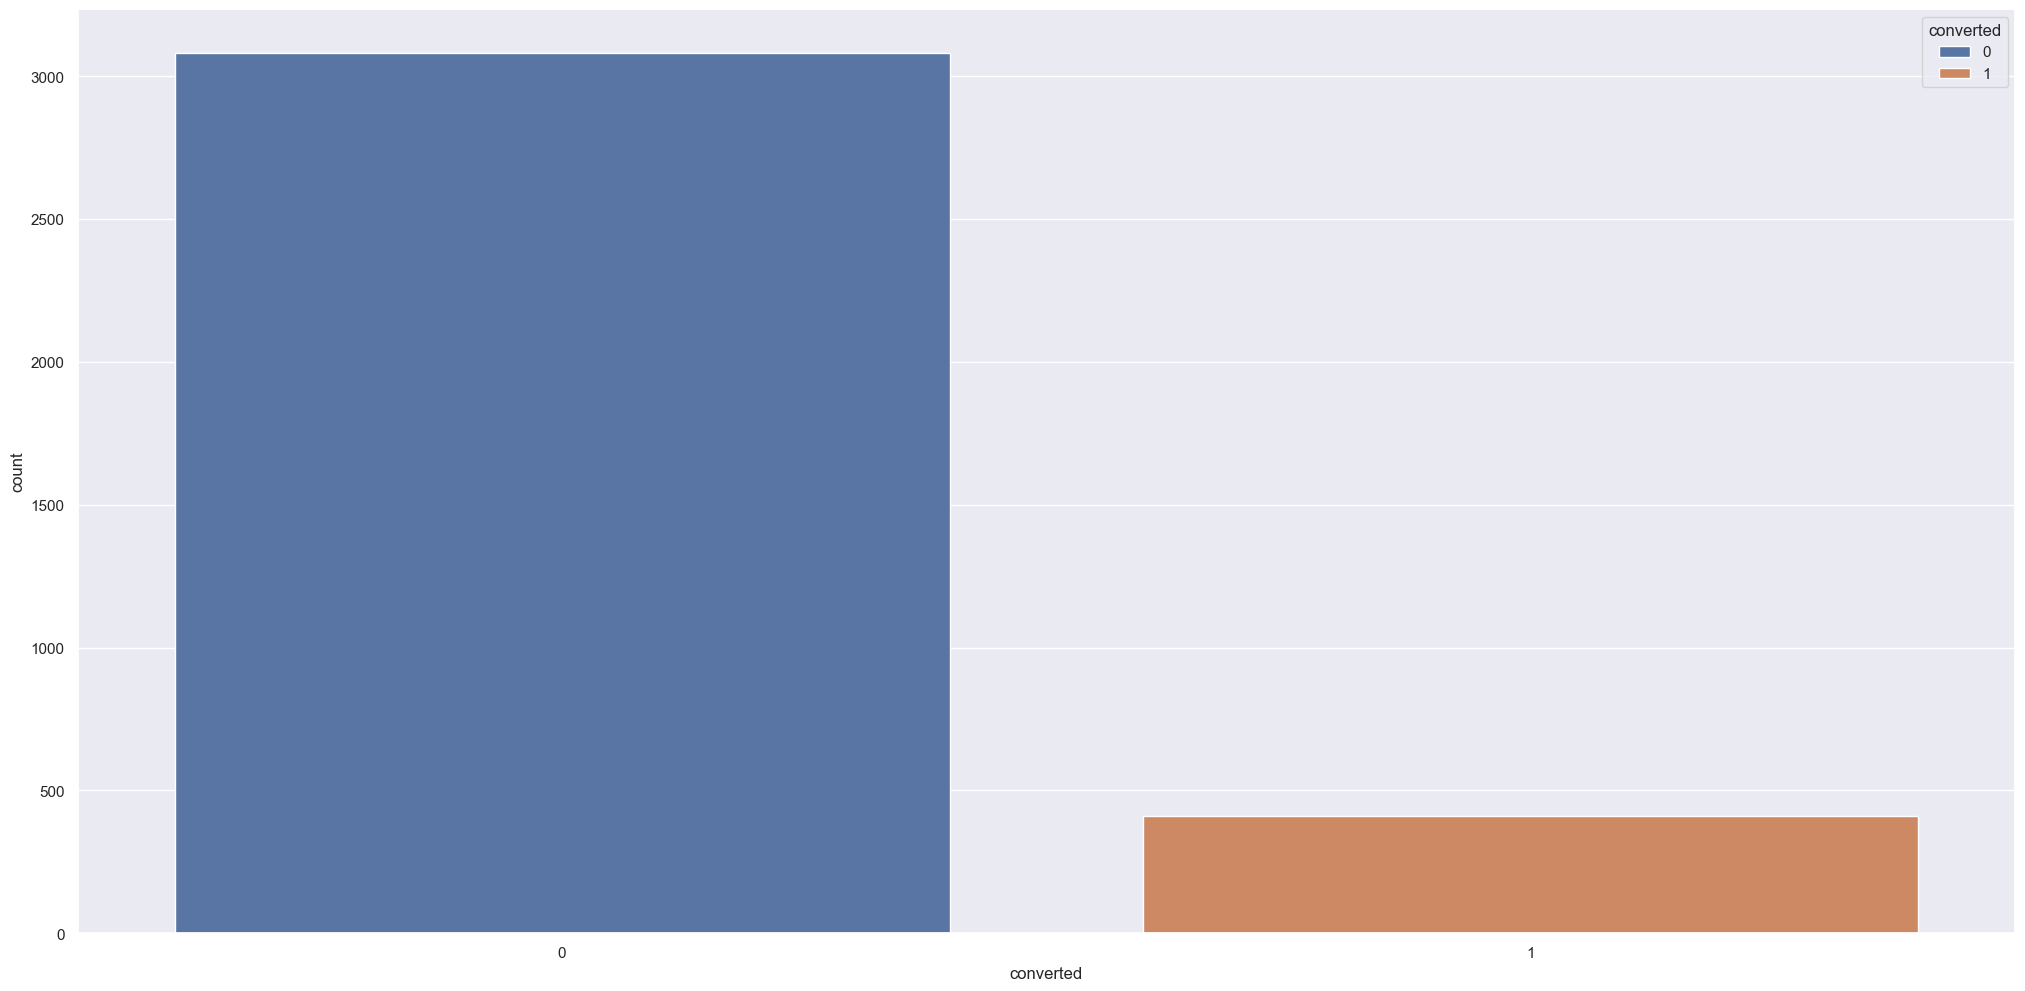

In [53]:
# Gráfico de barras das conversões da amostra do grupo de tratamento
sns.countplot(data=df_amostra_tratamento, x= df_amostra_tratamento['converted'], hue = df_amostra_tratamento['converted']);

In [54]:
# Quantidade de clientes que que converteram e compraram no grupo de tratamento
compradores_conveted = df_amostra_tratamento.loc[df_amostra_tratamento['converted']==1, 'converted'].sum()
compradores_conveted

411

In [55]:
# Total de clientes da amostra de tratamento
total_clientes = df_amostra_controle.shape[0]
total_clientes

3492

In [56]:
# Cálculo da taxa de conversão do grupo de tramento
taxa_tratamento = compradores_conveted / total_clientes
print('A taxa de conversão do grupo controle: {:.2f} %'.format(taxa_tratamento * 100) )

A taxa de conversão do grupo controle: 11.77 %


### 5.5.3 Comparando as taxas observadas nas amostras

In [57]:
print('Tamanho do grupo de controle:   {}'.format(df_amostra_tratamento.shape[0]))
print('Tamanho do grupo de tratamento: {}\n'.format(df_amostra_controle.shape[0]))
print('Taxa de conversão do grupo controle:      {:.4f}'.format(taxa_controle))
print('Taxa de conversão do grupo de tratamento: {:.4f}\n'.format(taxa_tratamento))


Tamanho do grupo de controle:   3492
Tamanho do grupo de tratamento: 3492

Taxa de conversão do grupo controle:      0.1180
Taxa de conversão do grupo de tratamento: 0.1177



# 6.0 Teste de Hipóteses 

**Teste Z para diferença entre proporções de duas amostras**

In [58]:
# juntando os dataframes de tratamento e de controle
df_ab = pd.DataFrame()
df_ab = pd.concat( [df_amostra_controle,df_amostra_tratamento]).reset_index(drop = True)
df_ab.shape

(6984, 5)

In [59]:
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,647219,2017-01-16 11:32:09.922735,control,old_page,0
1,677928,2017-01-15 20:54:56.411448,control,old_page,0
2,836230,2017-01-04 23:24:46.298369,control,old_page,0
3,725987,2017-01-03 17:55:49.923067,control,old_page,0
4,856603,2017-01-24 06:58:19.640487,control,old_page,0


In [60]:
# criando a tabela
df_table = df_ab[['group', 'converted']].groupby('group').agg( {'converted': ['sum', 'count']}).reset_index()

# removendo MultiIndex
df_table.columns = ['_'.join(col) for col in df_table.columns.values]

# renomeando colunas
df_table.columns = ['group','converted','total']
df_table

,group,converted,total
0,control,412,3492
1,treatment,411,3492


In [61]:
# =========================  Realização do teste z de diferenças entre proporções de duas amostras =========================

# Sucessos no grupo de controle
x1 = df_table['converted'].loc[df_table['group']=='control'].iloc[0]  
# Tamanho do grupo de controle
n1 = sample_n  

# Sucessos no grupo de tratamento
x2 = df_table['converted'].loc[df_table['group']=='treatment'].iloc[0]  
# Tamanho do grupo de tratamento
n2 = sample_n  

# Proporções
p1 = x1 / n1
p2 = x2 / n2

# Cálculo da estimativa ponderada de p1 e p2 - Proporção combinada
p = (x1 + x2) / (n1 + n2)
# Cálculo do complementar de p 
q = 1 - p

# verificação se o tamanho das amostras são grandes o suficiente para usar uma distribuição amostral normal. - Aproximação da distribuição binomial
if (n1*p >= 5) & (n1*q >= 5) & (n2*p >= 5) & (n2*q >= 5):
    print('\nAmostras são grandes o suficientes para a realização do teste z\n')
else:
    print('\nAmostras não são grandes o suficientes para a realização do teste z\n')


Amostras são grandes o suficientes para a realização do teste z



**Cálculo da estatistica do teste z diferença entre proporções de duas amostras**

# z = $\frac{( \hat{p}_{2} - \hat{p}_{1} ) - ( p2 - p1 )}{\sqrt{ \bar{p}*\bar{q} * ( \frac{1}{n_{1}}+\frac{1}{n_{2}}) }}$

obs: Independentemente de quais hipóteses formuladas, sempre assuma que não há diferença entre as proporções populacionais ( p1 = p2 ).

Isto é, o teste é realizado assumindo que H0 é verdade.

In [62]:
# Erro padrão - Denominador
SE = np.sqrt(p * q * (1/n1 + 1/n2))

# Estatístico z cauda superior - Numerador
z = ( (p2 - p1) - 0 ) / SE

# p-value para o teste uni-caudal
pvalue = 1 - stats.norm.cdf(z)

print(f'\nEstatística z: {z:.4f}\n')
print(f'p-value: {pvalue:.4f}\n')


Estatística z: -0.0371

p-value: 0.5148



# 7.0 Conclusão do Teste A/B

In [63]:
if pvalue < significance_level:
    (print( """Rejeita H0. 
            /nA nova página web tem uma taxa de conversão significativamente maior.
            \nA taxa de conversão da nova página é maior que 12%.
            \nA nova página é causou alteração no comportamento de compra comparado com a página de controle."""))
else:
    print( """Não rejeitamos a hipótese nula.
               \nNão há evidências suficientes para afirmar que a nova página web tem uma taxa de conversão maior.
               \nA nova página não é melhor que página de controle.""")

Não rejeitamos a hipótese nula.
               
Não há evidências suficientes para afirmar que a nova página web tem uma taxa de conversão maior.
               
A nova página não é melhor que página de controle.


# 8.0 Respondendo as perguntas de negócio

**1. A conversão da nova página é realmente melhor do a conversão da página atual?**

Não se pode afirmar que a nova página web tem uma taxa de conversão maior.

**2. Durante o teste qual foi o valor do faturamento total na venda do teclado bluetooth através da página antiga?**

In [64]:
preco_teclado = 4500

In [65]:
compradores_conveted = df_amostra_controle.loc[df_amostra_controle['converted']==1, 'converted'].sum()
compradores_conveted

412

In [66]:
faturamento_controle = compradores_conveted * preco_teclado
print('O faturamento total durante o teste da página atual corresponde: R$ {:.2f}'.format(faturamento_controle))

O faturamento total durante o teste da página atual corresponde: R$ 1854000.00


**3. Durante o teste qual foi o valor do faturamento total na venda do teclado bluetooth através da nova página?**

In [67]:
compradores_conveted = df_amostra_tratamento.loc[df_amostra_tratamento['converted']==1, 'converted'].sum()
compradores_conveted

411

In [68]:
faturamento_tratamento = compradores_conveted * preco_teclado
print('O faturamento total durante o teste da página nova corresponde: R$ {:.2f}'.format(faturamento_tratamento))

O faturamento total durante o teste da página nova corresponde: R$ 1849500.00


O faturamento da página nova não é estatíticamente diferente da página atual com base no tamanho do efeito esperado e do tamanho mínimo da amostra.